In [2]:
import numpy as np
import matplotlib.pyplot as plt

The data collected by Weldon are summarised as follows: the possible values of $X$, namely the set of integers between $0$ and $12$, are stored in `values_of_X`. For each such value, the number of outcomes in Weldon's experiment is stored in `data_weldon': among his $n=26306$ experiments, Weldon observed $185$ times that none of the $12$ dice landed a $5$ or a $6$, and so on.

In [3]:
values_of_X = np.arange(13)
data_weldon = np.array([185, 1149, 3265, 5475, 6114, 5194, 3067, 1331, 403, 105, 14, 4, 0])
n = np.sum(data_weldon)

We reproduce the histogram of the results here.

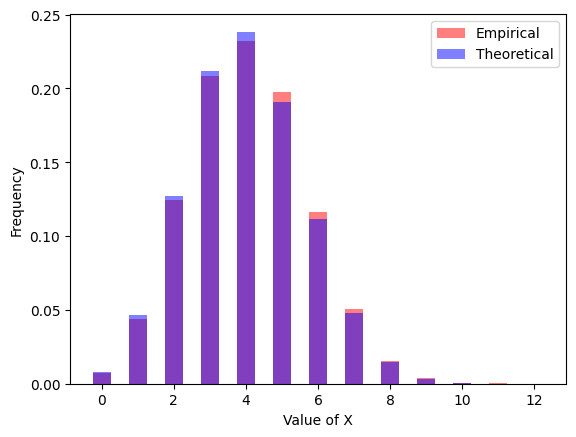

In [4]:
from scipy.stats import binom

# Histogram plot
data_freq = data_weldon / n  # Observed frequencies
theo_freq = binom.pmf(values_of_X, 12, 1/3)  # Theoretical frequencies

plt.bar(values_of_X, data_freq, width=0.5, color=(1, 0, 0, 0.5), label="Empirical")
plt.bar(values_of_X, theo_freq, width=0.5, color=(0, 0, 1, 0.5), label="Theoretical")
plt.xlabel("Value of X")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

## Beginning of the correction

Computation of the $p$-value for the goodness of fit to the $\mathcal{B}(12,1/3)$ distribution.

In [5]:
from scipy.stats import chisquare

chi2_stat, p_value = chisquare(f_obs=data_weldon, f_exp=theo_freq * n)
print("Chi-square test statistic:", chi2_stat)
print("Chi-square test p-value:", p_value)

Chi-square test statistic: 41.31222283064937
Chi-square test p-value: 4.344863576353511e-05


Confidence interval for $p$

In [6]:
barX = np.sum(values_of_X * data_weldon) / n
estim_p = barX / 12
print("Estimated p:", estim_p)

IC_len = 1.96 * np.sqrt(estim_p * (1 - estim_p) / (12*n))
IC_min = estim_p - IC_len
IC_max = estim_p + IC_len

print("Confidence interval:", (IC_min, IC_max))

Estimated p: 0.33769862388808636
Confidence interval: (np.float64(0.33604882686888077), np.float64(0.33934842090729195))


Goodness-of-fit to Binomial model

In [ ]:
from scipy.stats import chisquare

theo_freq2 = binom.pmf(values_of_X, 12, estim_p)
chi2_stat2, p_value2 = chisquare(f_obs=data_weldon, f_exp=theo_freq2 * n, ddof=1)
print("Goodness-of-fit test statistic:", chi2_stat2)
print("Goodness-of-fit test p-value:", p_value2)

Goodness-of-fit test statistic: 13.159014083146607
Goodness-of-fit test p-value: 0.28305955116510306
